In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [2]:
data = pd.read_csv(r'C:\Users\harsh\Desktop\Times Series Forecasting\Temps\Temps.csv')

In [3]:
data.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


# DATA PREPROCESSING

In [4]:
data.DATE = pd.to_datetime(data.DATE, dayfirst = True)

In [5]:
data.set_index("DATE" , inplace = True)

In [6]:
data.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-02-01,35.0,50.0,43.0,657,1756
2014-03-01,36.0,45.0,41.0,657,1757
2014-04-01,32.0,41.0,37.0,658,1757
2014-05-01,24.0,38.0,31.0,658,1758


In [7]:
del data["MinTemp"]
del data["MaxTemp"]
del data["Sunrise"]
del data["Sunset"]

In [8]:
data.head()

,AvgTemp
DATE,
2014-01-01,40.0
2014-02-01,43.0
2014-03-01,41.0
2014-04-01,37.0
2014-05-01,31.0


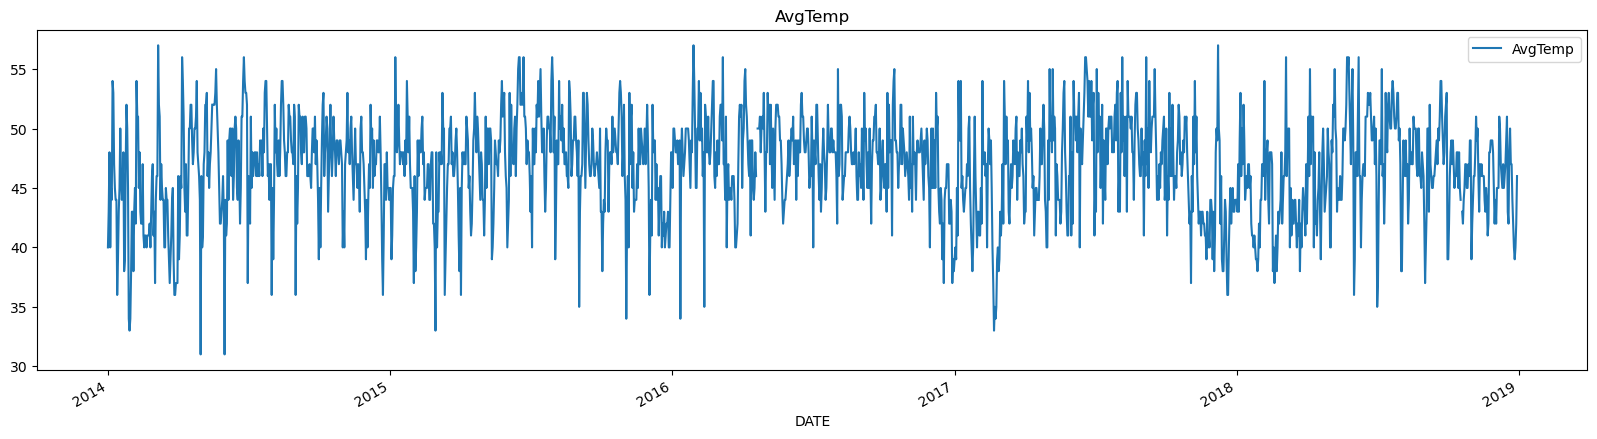

In [9]:
data.plot(figsize = (20,5))
plt.title('AvgTemp')
plt.show()

In [11]:
data['Last_mon_avgTemp'] = data['AvgTemp'].shift(+1)
data['Last_2mon_avgTemp'] = data['AvgTemp'].shift(+2)
data['Last_3mon_avgTemp'] = data['AvgTemp'].shift(+3)

In [12]:
data.head()

,AvgTemp,Last_mon_avgTemp,Last_2mon_avgTemp,Last_3mon_avgTemp
DATE,,,,
2014-01-01,40.0,NaN,NaN,NaN
2014-02-01,43.0,40.0,NaN,NaN
2014-03-01,41.0,43.0,40.0,NaN
2014-04-01,37.0,41.0,43.0,40.0
2014-05-01,31.0,37.0,41.0,43.0


In [13]:
data = data.dropna()

In [14]:
x1 = data['Last_mon_avgTemp']
x2 = data['Last_2mon_avgTemp']
x3 = data['Last_3mon_avgTemp']
y = data['AvgTemp']

In [15]:
x1,x2,x3,y = np.array(x1),np.array(x2),np.array(x3),np.array(y)

In [16]:
x1,x2,x3 = x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1)

In [17]:
final_x = np.concatenate((x1,x2,x3),axis = 1)

In [18]:
print(final_x)

[[41. 43. 40.]
 [37. 41. 43.]
 [31. 37. 41.]
 ...
 [39. 40. 42.]
 [40. 39. 40.]
 [42. 40. 39.]]


# Train-Test Split

In [27]:
X_train = final_x[:-100]
X_test = final_x[-100:]
y_train = y[:-100]
y_test = y[-100:]

# Decision Tree

In [28]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

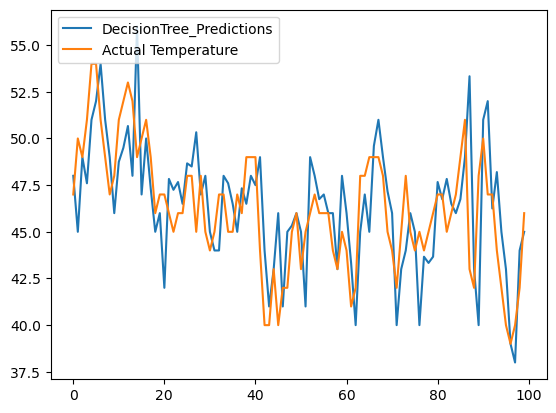

In [33]:
pred=model.predict(X_test)
plt.plot(pred,label='DecisionTree_Predictions')
plt.plot(y_test,label='Actual Temperature')
plt.legend(loc="upper left")
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt
err=sqrt(mean_squared_error(pred,y_test))

In [35]:
print('Mean Squared Error for Decision Tree Model is:',err)

Mean Squared Error for Decision Tree Model is: 2.8058975589124975
